# Corona Vaccine Distribution

# Introduction

## problem

# Initiation

In [63]:
# import module
import random
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [64]:
# init_data = [50, 23, 19, 47, 48]
# vaksin = 270

### Individu

In [65]:
def create_individu(max):
    return [random.randint(i, max) for i in init_data]

### Population

In [66]:
def create_population(num_of_individu, max):
    return [create_individu(max) for i in range(num_of_individu)]

### Fitness Function

In [67]:
def fitness_value(individu, target):
    summed = sum(individu)
    return int(target-summed)

In [68]:
def calc_population_fitness(population, target):
    return [fitness_value(individu, target) for individu in population]

# Representation

## One Variable

In [69]:
# pop = create_population(10, 55)
# fitness = calc_population_fitness(pop, vaksin)
# print('populasi ',pop)
# print('fitnes populasi ',fitness)

## Two Variable

# Parent Selection

## Best Selection

In [70]:
def best_selection(population, target):
    pop_tuple = [(idv, fitness_value(idv, target)) for idv in population]
    sorted_tuple = sorted(pop_tuple, key=lambda pop: pop[1])  # sort by fitness
    # return 2 best individu
    best2 = []
    for idv in sorted_tuple:
        best2.append(idv[0])
    return best2[0:2]
    # return sorted_tuple[0:2] # untuk tampilan tuple('population', 'fitnes')

In [71]:
# print('hasil dari best ', best_selection(pop, vaksin))

## Roulette

In [72]:
# roulete
def roulette(population, vaksin):
    '''
    aturan :
    jika telah terpilih 1 
    maka individu itu harus terdelete dari populasi untuk dilakukan roulete lagi
    '''
    summed = sum(calc_population_fitness(population, vaksin))
    point = random.randint(0, summed)
    total = 0
    for individu in population:
        total = total + fitness_value(individu, vaksin)
        if point < total:
            return individu


def remove_idv_from_roulette(population, individu):
    population.remove(individu)
    return population

def couple_roulette(population, vaksin):
    cp_pop = population.copy()
    selected_parent = []
    r1 = roulette(cp_pop, vaksin)
    selected_parent.append(r1)
    beda = True
    while(beda):
        r2 = roulette(cp_pop, vaksin)
        if r2 == r1:
            beda = True
        else:
            beda = False
            selected_parent.append(r2)
    return selected_parent
    

In [73]:
# print('parent yang terpilih dari roulete ',couple_roulette(pop, vaksin))

## Simple Tournamen

In [74]:
def simple_tournament(population, target):
    random_idv = random.sample(population, 2)
    idv1 = random_idv[0]
    idv2 = random_idv[1]
    if fitness_value(idv1, target) >= fitness_value(idv2, target):
        return idv1
    else:
        return idv2
    
def parent_from_tournamen(population, target):
    selected = []
    for i in range(2):
        p = simple_tournament(population, target)
        selected.append(p)
    return selected

# Crossover

## Uniform

In [75]:
def uniform(parent):
    treshold = 0.6
    papa = parent[0]
    mama = parent[1]
    temp_indv = []
    for i in range(len(papa)):
        temp_indv.append(round(random.uniform(0, 1), 1))

    # print(temp_indv)
    # swap process
    offspring = []
    for i, g in enumerate(temp_indv):
        if g >= treshold:
            # isi gen papa
            offspring.append(papa[i])
        elif g < treshold:
            # isi gen mama
            offspring.append(mama[i])
    return offspring

In [76]:
# hasil_cross = uniform(selected_parent)
# print('hasil uniform cross', hasil_cross)
# print('nilai fitnesnya', fitness_value(hasil_cross, vaksin))

## Point Crossover

In [77]:
def point_xover(parent):
    papa = parent[0]
    mama = parent[1]
    point_line = random.randint(0,len(papa)-1)
    offspring = papa[:point_line] + mama[point_line:]
    return offspring

## Order Crossover

# Mutation

In [78]:
def mutate(offspring, validation_data, max_val, mut_chance=0.67):
    '''
    mutasikan individu baru dengan metode replace
    nilai replace = random
    posisi gen = random
    lakukan validasi dengan init_data sebelum return
    '''
    r = round(random.uniform(0, 1), 2)
    if mut_chance > r:
        posisi = random.randint(0, len(offspring)-1)
        offspring[posisi] = random.randint(validation_data[posisi], max_val)
        return offspring
    else:
        return offspring

In [79]:
# new_off = mutate(hasil_cross, init_data, 55)
# print('new offspring',new_off)
# print('nilai fitnesnya',fitness_value(new_off,vaksin))

# Natural Selection

## Replace Worst Individu

In [80]:
def replace_worst_individu(population, new_offspring, target):
    population.append(new_offspring)

    # sorting population berdasarkan fitnes
    pop_tuple = [(idv, fitness_value(idv, target)) for idv in population]
    sorted_tuple = sorted(pop_tuple, key=lambda idv: idv[1], reverse=False)

    # tuple terakhir pasti fitnes terjelek
    sorted_tuple.pop()
    pop = []
    for idv in sorted_tuple:
        pop.append(idv[0])
    return pop

def print_replace_worst_individu(population, new_offspring, target):
    population.append(new_offspring)

    # sorting population berdasarkan fitnes
    pop_tuple = [(fitness_value(idv, target), idv) for idv in population]
    sorted_tuple = sorted(pop_tuple, key=lambda idv: idv[0], reverse=False)

    # tuple terakhir pasti fitnes terjelek
    sorted_tuple.pop()
    return sorted_tuple

In [81]:
# replace_worst_individu(pop, new_off, vaksin)

## Replace Worst Parent

# Run Code Together
*coba kombinasinya*

In [82]:
'''
percobaan
kombinasi = one variable + best selection + uniform crossover + mutation *replace + replace worst individu
generasi = 100
'''
init_data = [50, 23, 19, 47, 48]
vaksin = 270
max_val = 55
pop = create_population(10, max_val)
fitness = calc_population_fitness(pop, vaksin)



generation = pop
cur_best_fitness = 100
histori = []
i = 1
print('generasi awal',generation)
print('--------------------------')
while (cur_best_fitness >= 0 and i <=100):
#for i in range(1,80):
    print('ini generasi ke ', i)
    hsl_selection = best_selection(generation, vaksin)
    #hsl_selection = couple_roulette(generation, vaksin)
    #hsl_selection = parent_from_tournamen(generation, vaksin)
    print('hasil selection', hsl_selection)
    #hsl_cross = uniform(hsl_selection)
    hsl_cross = point_xover(hsl_selection)
    print('hasil cross', hsl_cross)
    hsl_mutate = mutate(hsl_cross, init_data, max_val)
    print('hasil mutasi', hsl_mutate)
    hsl_replacement = replace_worst_individu(generation, hsl_mutate, vaksin)
    print('populasi baru')
    print(hsl_replacement)
    print('fitnes with individu')
    print(print_replace_worst_individu(generation, hsl_mutate, vaksin))
    print('best fit and best individu in generation')
    print(print_replace_worst_individu(generation, hsl_mutate, vaksin)[0])
    print('--------------------------')
    
    # ambil fitnes terbaik setiap generasi
    best_fit, best_idv = print_replace_worst_individu(generation, hsl_mutate, vaksin)[0]
    if best_fit < cur_best_fitness:
        cur_best_fitness = best_fit
    i+=1
    histori.append(best_fit)
    # reset generation dan isi dengan 
    generation = hsl_replacement

generasi awal [[55, 45, 52, 47, 50], [53, 47, 42, 50, 53], [54, 33, 22, 52, 48], [51, 37, 50, 52, 52], [53, 39, 39, 50, 54], [52, 25, 21, 52, 53], [51, 24, 27, 52, 55], [52, 27, 34, 53, 48], [51, 51, 50, 51, 49], [55, 37, 19, 48, 50]]
--------------------------
ini generasi ke  1
hasil selection [[51, 51, 50, 51, 49], [55, 45, 52, 47, 50]]
hasil cross [55, 45, 52, 47, 50]
hasil mutasi [55, 45, 52, 47, 52]
populasi baru
[[51, 51, 50, 51, 49], [55, 45, 52, 47, 52], [55, 45, 52, 47, 50], [53, 47, 42, 50, 53], [51, 37, 50, 52, 52], [53, 39, 39, 50, 54], [52, 27, 34, 53, 48], [54, 33, 22, 52, 48], [51, 24, 27, 52, 55], [55, 37, 19, 48, 50]]
fitnes with individu
[(18, [51, 51, 50, 51, 49]), (19, [55, 45, 52, 47, 52]), (19, [55, 45, 52, 47, 52]), (21, [55, 45, 52, 47, 50]), (25, [53, 47, 42, 50, 53]), (28, [51, 37, 50, 52, 52]), (35, [53, 39, 39, 50, 54]), (56, [52, 27, 34, 53, 48]), (61, [54, 33, 22, 52, 48]), (61, [51, 24, 27, 52, 55]), (61, [55, 37, 19, 48, 50])]
best fit and best individu

ini generasi ke  90
hasil selection [[54, 51, 50, 55, 55], [55, 51, 50, 55, 53]]
hasil cross [54, 51, 50, 55, 53]
hasil mutasi [53, 51, 50, 55, 53]
populasi baru
[[54, 51, 50, 55, 55], [55, 51, 50, 55, 53], [55, 51, 50, 55, 53], [55, 51, 50, 55, 53], [55, 51, 50, 55, 53], [55, 51, 50, 55, 53], [55, 51, 50, 55, 53], [54, 54, 50, 52, 53], [54, 54, 50, 52, 53], [54, 51, 50, 55, 53]]
fitnes with individu
[(5, [54, 51, 50, 55, 55]), (6, [55, 51, 50, 55, 53]), (6, [55, 51, 50, 55, 53]), (6, [55, 51, 50, 55, 53]), (6, [55, 51, 50, 55, 53]), (6, [55, 51, 50, 55, 53]), (6, [55, 51, 50, 55, 53]), (7, [54, 54, 50, 52, 53]), (7, [54, 54, 50, 52, 53]), (7, [54, 51, 50, 55, 53]), (8, [53, 51, 50, 55, 53])]
best fit and best individu in generation
(5, [54, 51, 50, 55, 55])
--------------------------
ini generasi ke  91
hasil selection [[54, 51, 50, 55, 55], [55, 51, 50, 55, 53]]
hasil cross [54, 51, 50, 55, 53]
hasil mutasi [54, 51, 50, 51, 53]
populasi baru
[[54, 51, 50, 55, 55], [55, 51, 50, 55, 53

# Evaluation Bar

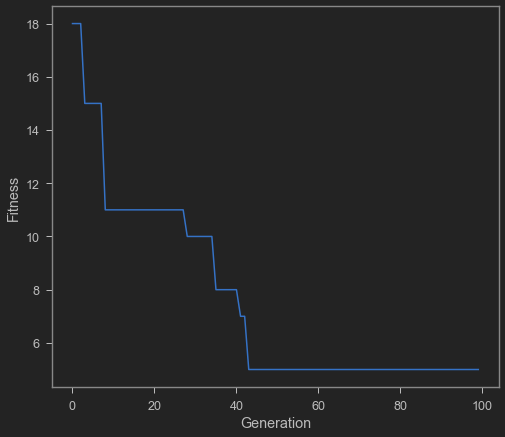

In [83]:
plt.plot(histori,marker='')
plt.xlabel("Generation")
plt.ylabel("Fitness")

plt.show()